<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/08-01/GX1_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1255, done.
remote: Counting objects: 100% (545/545), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 1255 (delta 349), reused 497 (delta 314), pack-reused 710
Receiving objects: 100% (1255/1255), 80.93 MiB | 8.24 MiB/s, done.
Resolving deltas: 100% (718/718), done.
Updating files: 100% (169/169), done.


'/content'

### 30-07-24 LiTaO3 Ycut Gold deposited 1st sample

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75%

Taped the gating electrode at maximum



In [ ]:
%cd "/content/gator/data/08-01/"

/content/gator/data/07-30


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [ ]:
prep_csv('defbuffer1_0801_111336.csv')
df = pd.read_csv('defbuffer1_0801_111336.csv')


Fill Mode,1



In [ ]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,2.890762e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000115,Volt DC,0.01,F,2W,F,F,0.000000
1,-2.833820e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000014,Volt DC,0.01,F,2W,F,F,0.069403
2,-4.410922e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000018,Volt DC,0.01,F,2W,F,F,0.138737
3,-6.642542e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000047,Volt DC,0.01,F,2W,F,F,0.208077
4,-3.560054e-11,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.000018,Volt DC,0.01,F,2W,F,F,0.277410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23461,3.596928e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.999981,Volt DC,1.00,T,2W,F,F,1861.831952
23462,3.600143e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.999981,Volt DC,1.00,T,2W,F,F,1861.901271
23463,3.549057e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.999981,Volt DC,1.00,T,2W,F,F,1861.970618
23464,3.559847e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.999981,Volt DC,1.00,T,2W,F,F,1862.039939


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

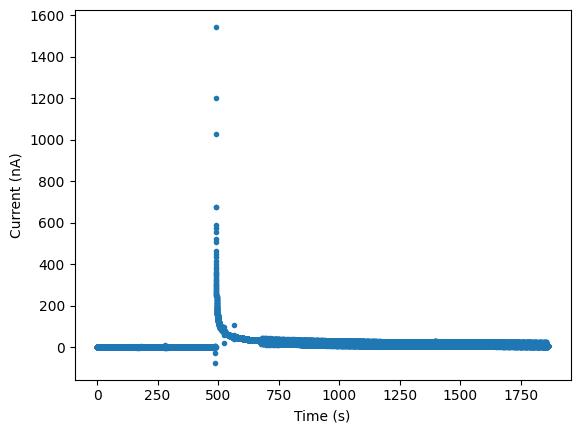

In [ ]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Gating worked ! Periodicity happening :))

Text(0.5, 0, 'Time (s)')

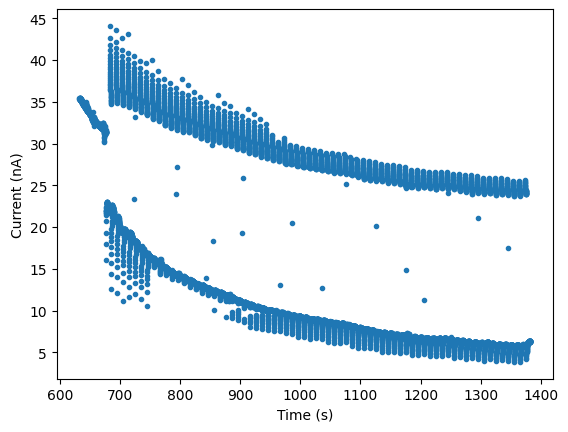

In [ ]:
cut1 = 7000
cut2 = 17000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

We can see a periodicity but the current is dropping (?)

Text(0.5, 0, 'Time (s)')

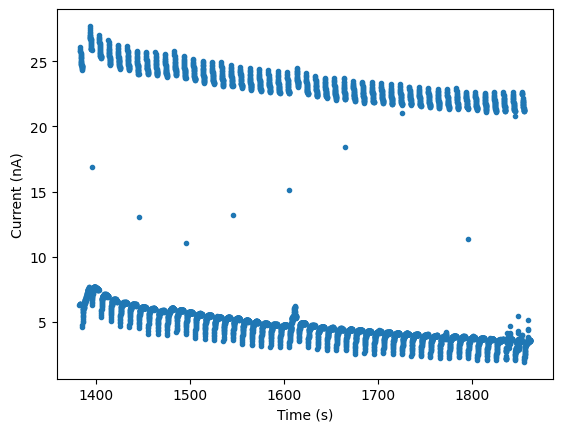

In [ ]:
cut1 = 17000
cut2 = None
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [ ]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value']
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-11-db179bee8aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [ ]:

# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

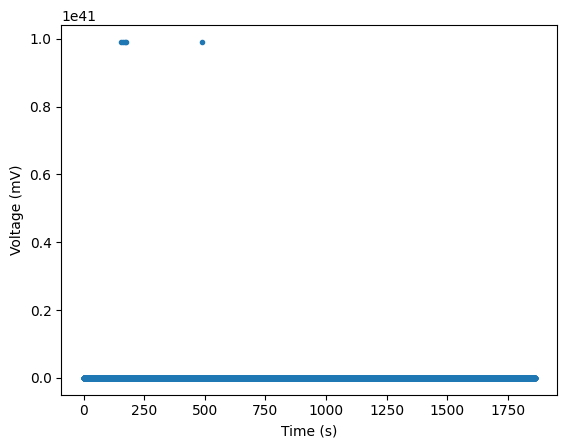

In [ ]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
prep_csv('defbuffer1_0730_092553.csv')
df2 = pd.read_csv('defbuffer1_0730_092553.csv')

Fill Mode,1



In [ ]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.004166,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,-2.393060e-08,Amp DC,0.01,T,2W,F,F,0.000000
1,-0.000076,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,1.779510e-08,Amp DC,0.01,T,2W,F,F,0.069415
2,-0.004587,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,2.405410e-08,Amp DC,0.01,T,2W,F,F,0.138761
3,-0.008855,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,1.849060e-08,Amp DC,0.01,T,2W,F,F,0.208112
4,-0.012595,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,1.849060e-08,Amp DC,0.01,T,2W,F,F,0.277444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.000003,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,-9.695070e-08,Amp DC,0.01,F,2W,F,F,208.191222
2969,0.000003,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,-9.764610e-08,Amp DC,0.01,F,2W,F,F,208.260552
2970,0.000003,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,-9.486440e-08,Amp DC,0.01,F,2W,F,F,208.329874
2971,0.000003,Volt DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,-9.347350e-08,Amp DC,0.01,F,2W,F,F,208.399205


In [ ]:
# Time (s)
T = df2['Relative Time']

# Current (nA)
I = df2['Reading'] * 1e9

# Potential (mV)
V = df2['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

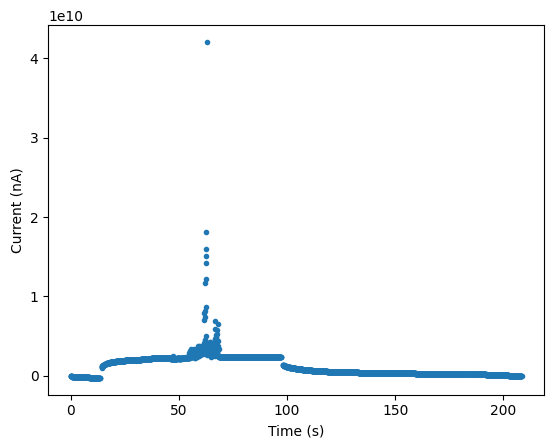

In [ ]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

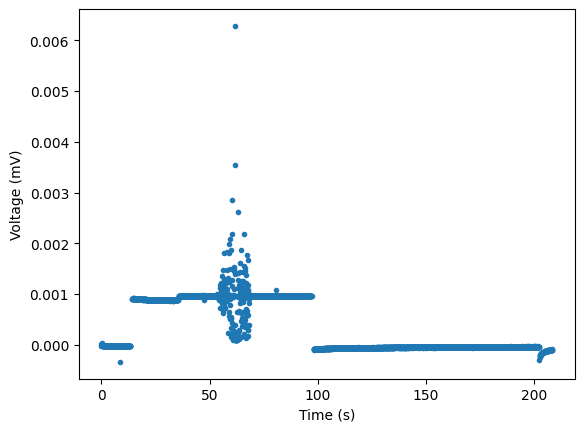

In [ ]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

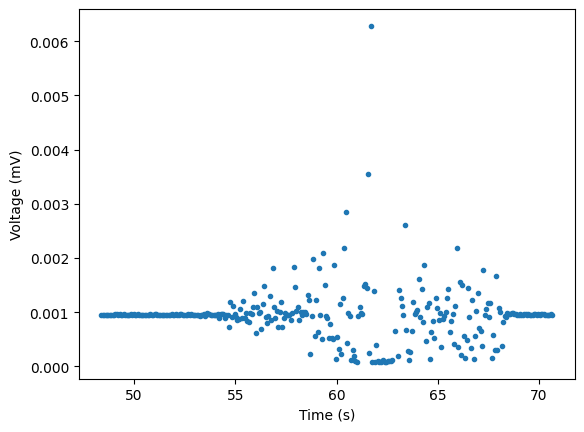

In [ ]:
cut1 = 680
cut2 = 1000
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

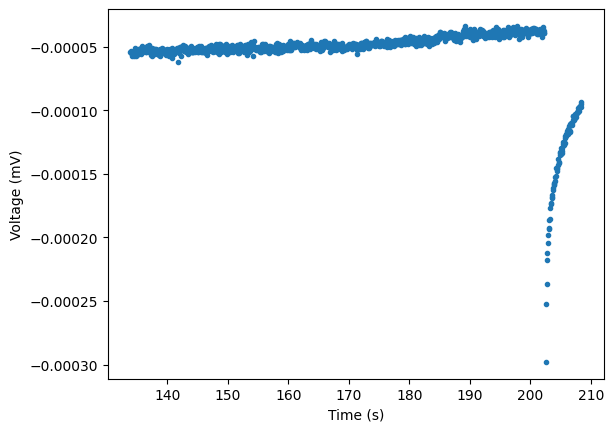

In [ ]:
cut1 = 1900
cut2 = -1
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')